In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/home/placement/Desktop/naren/fiat500.csv")

In [3]:
data1=data.drop(['ID','lat','lon'],axis=1)

In [4]:
data1

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [5]:
data1['model']=data1['model'].map({'lounge':1,'pop':2,'sport':3})

In [6]:
data1

,model,engine_power,age_in_days,km,previous_owners,price
0,1,51,882,25000,1,8900
1,2,51,1186,32500,1,8800
2,3,74,4658,142228,1,4200
3,1,51,2739,160000,1,6000
4,2,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,3,51,3712,115280,1,5200
1534,1,74,3835,112000,1,4600
1535,2,51,2223,60457,1,7500
1536,1,51,2557,80750,1,5990


In [30]:
data2=data1.loc[(data1.model==1)]

In [31]:
data2

,model,engine_power,age_in_days,km,previous_owners,price
0,1,51,882,25000,1,8900
3,1,51,2739,160000,1,6000
6,1,51,731,11600,1,10750
7,1,51,1521,49076,1,9190
11,1,51,366,17500,1,10990
...,...,...,...,...,...,...
1528,1,51,2861,126000,1,5500
1529,1,51,731,22551,1,9900
1530,1,51,670,29000,1,10800
1534,1,74,3835,112000,1,4600


In [48]:
y=data2['price']
x=data2.drop('price',axis=1)

In [49]:
y

0        8900
3        6000
6       10750
7        9190
11      10990
        ...  
1528     5500
1529     9900
1530    10800
1534     4600
1536     5990
Name: price, Length: 1094, dtype: int64

In [50]:
x

,model,engine_power,age_in_days,km,previous_owners
0,1,51,882,25000,1
3,1,51,2739,160000,1
6,1,51,731,11600,1
7,1,51,1521,49076,1
11,1,51,366,17500,1
...,...,...,...,...,...
1528,1,51,2861,126000,1
1529,1,51,731,22551,1
1530,1,51,670,29000,1
1534,1,74,3835,112000,1


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [52]:
x_test.head(5)

,model,engine_power,age_in_days,km,previous_owners
676,1,51,762,18609,1
215,1,51,701,25000,1
146,1,51,4018,152900,1
1319,1,51,731,20025,1
1041,1,51,640,38231,1


In [53]:
x_train.shape

(732, 5)

In [54]:
y_train.shape

(732,)

In [55]:
x_train.head()

,model,engine_power,age_in_days,km,previous_owners
441,1,51,762,36448,1
701,1,51,701,27100,1
695,1,51,3197,51083,1
1415,1,51,670,33000,1
404,1,51,456,14000,1


In [56]:
y_train.head()

441      8980
701     10300
695      5880
1415    10490
404      9499
Name: price, dtype: int64

In [57]:
x_test.head()

,model,engine_power,age_in_days,km,previous_owners
676,1,51,762,18609,1
215,1,51,701,25000,1
146,1,51,4018,152900,1
1319,1,51,731,20025,1
1041,1,51,640,38231,1


In [58]:
y_test.head()

676     10250
215      9790
146      5500
1319     9900
1041     8900
Name: price, dtype: int64

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters)

ridge_regressor.fit(x_train, y_train)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [69]:
ridge_regressor.best_params_

{'alpha': 30}

In [70]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [71]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

519771.8129989742

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.8373030813683995

In [75]:

Results=pd.DataFrame(columns=['Actual','predicted'])
Results['Actual']=y_test
Results['predicted']=y_pred_ridge
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(10)


,index,Actual,predicted,ID
0,676,10250,10045.347779,0
1,215,9790,9989.171535,1
2,146,5500,4769.099603,2
3,1319,9900,10048.683238,3
4,1041,8900,9813.944798,4
5,1425,9500,8678.143561,5
6,409,10450,10173.797921,6
7,617,9790,10180.627008,7
8,1526,9300,9107.315259,8
9,1010,4600,5625.007407,9


[]

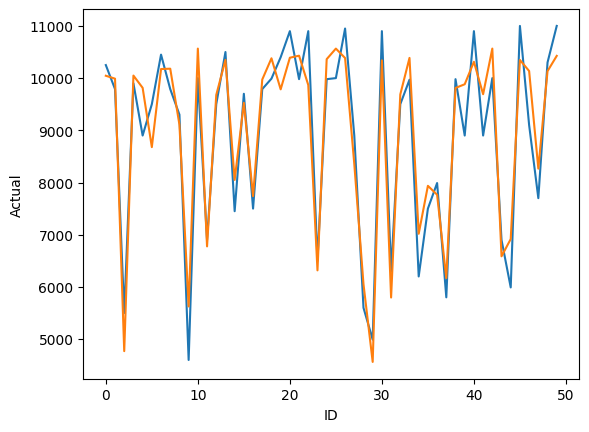

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='Actual',data=Results.head(50))
sns.lineplot(x='ID',y='predicted',data=Results.head(50))
plt.plot()